Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [1]:
library('tidyverse')
library('nycflights13')

flights %>% 
    group_by(carrier) %>%
    count() %>%
    ungroup() %>%
    slice_max(n, n = 3) %>%
    left_join(airlines, by = 'carrier')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



carrier,n,name
<chr>,<int>,<chr>
UA,58665,United Air Lines Inc.
B6,54635,JetBlue Airways
EV,54173,ExpressJet Airlines Inc.


Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

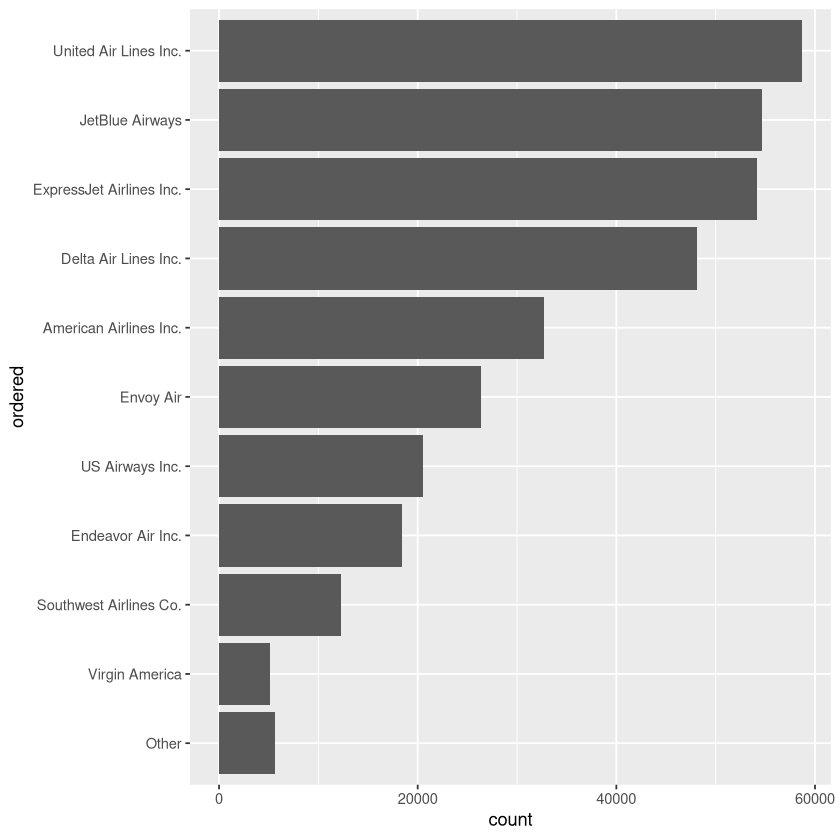

In [30]:
df_joined = airlines %>% 
    left_join(flights, by = 'carrier') %>%
    # group_by(name) %>%
    mutate(ordered = name %>% fct_infreq %>% fct_lump(n=10) %>% fct_rev)

p = ggplot(df_joined, aes(y = ordered))

p = p + geom_bar()

p